## Analysis of Helical Axis

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/base_pairs_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* ``HelAxis_odna.dat`` input file is required in this tutorial. This file is generated from ``do_x3dna`` using the trajectory, which contains the free DNA. These two file **should be** present inside tutorial_data of the current/present working directory.
  
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


* **Additional Requirement:** [SciPy package](http://www.scipy.org/)


* Detailed documentation is provided [here](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html).

### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dnaMD
%matplotlib inline

### Initializing DNA object and storing data to it

* [DNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA) is initialized by using the total number of base-pairs

* Local helical axis is formed by two adjacent base-pairs. Therefore, total number of Helical-axis postion is less than one of total number of base-pairs.


* X, Y and Z positions (**Helical X-axis**, **Helical Y-axis** and **Helical Z-axis**) of the Helical axis can be read and stored in DNA object from the input file using function [set_helical_axis(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.set_helical_axis).


* To speed up processing and analysis, data can be stored in a HDF5 file by including HDF5 file name as a argument during initialization. Same file can be used to store and retrieve all other parameters.

In [2]:
## Initialization
fdna = dnaMD.DNA(60)     #Initialization for 60 base-pairs free DNA

## If HDF5 file is used to store/save data use these:
# fdna = dnaMD.DNA(60, filename='odna.h5')     #Initialization for 60 base-pairs free DNA

## Loading data from input files in respective DNA object
# Number of local helical axis positions = Number of base-pairs - one
# Number of helcial steps in a 60 base-pairs DNA = 59
fdna.set_helical_axis('tutorial_data/HelAxis_odna.dat')


Reading file : tutorial_data/HelAxis_odna.dat
Reading frame 1000
Finished reading.... Total number of frame read =  1001


### Smoothening of Helical Axis

* The helical axis postions calculated from ``do_x3dna`` are localized and do not form a smooth global axis upon joining these positions.


* The helical axis could be smoothed by spline interpolation using method [generate_smooth_axis(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.generate_smooth_axis).


* A smooth three dimensional curve is fitted along the positions of local helical axis by spline interpolation method implemented in [SciPy package](http://www.scipy.org/).


* This procedure might take long time on large trajectory due to the fitting procedure.


**Warning:** Lower value of ``smooth`` may lead to an artifact of local sharp kink in the smoothed axis. Higher value of ``smooth`` may lead to the calculation of wrong helical axis.


---

In [3]:
### Smoothening of helical axis
fdna.generate_smooth_axis(smooth=500, spline=3, fill_point=6)

Fitting spline curve on helical axis of frame 1000 out of 1001 frames
Finished spline curve fitting...


### Extraction of original and smoothed helical axis postions as a function of time (manually)

* Psotions of original and smoothed helical axis for the given base-steps range can be extracted from the DNA obejct using function [dnaMD.DNA.get_parameters(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.get_parameters).


* Following example shows, how to extract the data.

In [4]:
### Extraction of original helical axis for 5-55 base-steps segment

# X-axis original
RawX, bp_idx = fdna.get_parameters('helical x-axis', [5, 55], bp_range=True)
# Y-axis original
RawY, bp_idx = fdna.get_parameters('helical y-axis', [5, 55], bp_range=True)
# Z-axis original
RawZ, bp_idx = fdna.get_parameters('helical z-axis', [5, 55], bp_range=True)

# X-axis smoothed
SmoothX, bp_idx = fdna.get_parameters('helical x-axis smooth', [5, 55], bp_range=True)
# Y-axis smoothed
SmoothY, bp_idx = fdna.get_parameters('helical y-axis smooth', [5, 55], bp_range=True)
# Z-axis smoothed
SmoothZ, bp_idx = fdna.get_parameters('helical z-axis smooth', [5, 55], bp_range=True)


# Here RawX is a 2D array of shape (base-step, nframes)

# Some examples
## x, y, z coordinates of nth base-step in mth frame: base-step index = (n - 5), frame index = (m - 1)
print ( "\n====== Some Examples ======" )
print ("Original coordinates of 8th base-step in 15th frame  : [ %8.3f %8.3f %8.3f ]" % 
       (RawX[3][14], RawY[3][14], RawZ[3][14]))
print ("Smoothened coordinates of 8th base-step in 15th frame: [ %8.3f %8.3f %8.3f ]" % 
       (SmoothX[3][14], SmoothY[3][14], SmoothZ[3][14]))

print ("\nOriginal coordinates of 40th base-step in 900th frame  : [ %8.3f %8.3f %8.3f ]" % 
       (RawX[37][899], RawY[37][899], RawZ[37][899]))
print ("Smoothened coordinates of 40th base-step in 900th frame: [ %8.3f %8.3f %8.3f ]\n" % 
       (SmoothX[37][899], SmoothY[37][899], SmoothZ[37][899]))


====== Some Examples ======
Original coordinates of 8th base-step in 15th frame  : [  101.280  173.630   84.670 ]
Smoothened coordinates of 8th base-step in 15th frame: [  106.443  172.187   85.432 ]

Original coordinates of 40th base-step in 900th frame  : [  208.140  171.130   79.730 ]
Smoothened coordinates of 40th base-step in 900th frame: [  205.639  172.066   80.286 ]



### To calculate curvature and tangent vectors along helical axis

* The bending at a specifc position on the helical axis can be quantifed by its curvature. 


* Approximate bending of a DNA segment could be also quantified by the angle between the tangent vectors of the segment's end points


* Both curvature and tangent vectors could be calculated using [dnaMD.DNA.calculate_curvature_tangent(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.calculate_curvature_tangent) function.


* Curvature and tangent vectors **should be** calculated after generating the smooth helical axis.

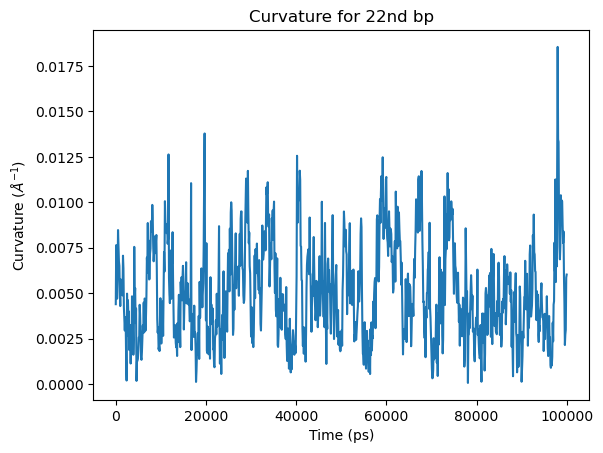

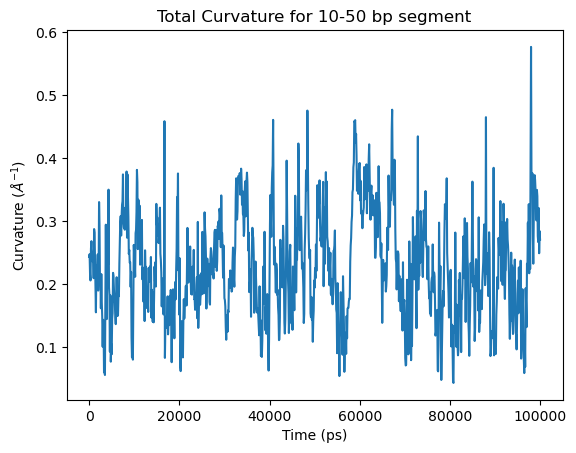

In [5]:
### Calculating curvature and tangent vectors
# If store_tangent=True; then tangent vectors will be stored for later use, otherwise it will be discarded
fdna.calculate_curvature_tangent(store_tangent=True)
fdna.calculate_angle_bw_tangents([5,50])


# Curvature vs Time for 22nd bp
plt.title('Curvature for 22nd bp')
time, value = fdna.time_vs_parameter('curvature', [22])
plt.plot(time, value)
plt.xlabel('Time (ps)')
plt.ylabel('Curvature ($\AA^{-1}$)')
plt.show()

# Total Curvature vs Time for 10-50 bp segment
plt.title('Total Curvature for 10-50 bp segment')
# Bound DNA
# Here, Total Curvature is considered as the sum over the local curvatures of the base-steps
time, value = fdna.time_vs_parameter('curvature', [10, 50], merge=True, merge_method='sum')
plt.plot(time, value)

plt.xlabel('Time (ps)')
plt.ylabel('Curvature ($\AA^{-1}$)')
plt.show()

### Writing trajectory of Helical Axis

*  Calculated helical axis from do_x3dna and smoothed helical axis could be written as trajectory in PDB format file using [dnaMD.DNA.write_haxis_pdb(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.write_haxis_pdb)


* If ``write_smooth_axis=True``: Coordinates of smoothed helical axis will be written


* If ``write_orig_axis=True``: Coordinates of original helical axis will be written


* If ``write_curv=True``: The calculated curvature of smooth helical axis will be written in B-factor field of PDB file. This might be helpful to visualize the helical axis according to its bending in color scale.


* The values of curvature might be very small ( < 0.01 ). Therefore, scaling up of curvature by 100 to 1000 times may help in better visualization on color scale.


In [6]:
# Only smoothed helical axis
fdna.write_haxis_pdb(filename='only_smoothed_axis.pdb', write_smooth_axis=True)

# Only original helical axis
fdna.write_haxis_pdb(filename='only_original_axis.pdb', write_smooth_axis=False, write_orig_axis=True)

# Both original and smoothed axis
fdna.write_haxis_pdb(filename='original_smoothed_axis.pdb', write_smooth_axis=True, write_orig_axis=True)

# Both original and smoothed axis with curvature scaled-up by 1000 times
fdna.write_haxis_pdb(filename='original_smoothed_axis_curvature_.pdb', write_smooth_axis=True, write_orig_axis=True, 
                     write_curv=True, scale_curv=1000)

### Angle between tangent vectors

* Approximate bending of a DNA segment could be also quantified by the angle between the tangent vectors of the segment's end points



* Angle between the tangent vectors can be calculated using [dnaMD.DNA.calculate_angle_bw_tangents(...)](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaMD.DNA.calculate_angle_bw_tangents)


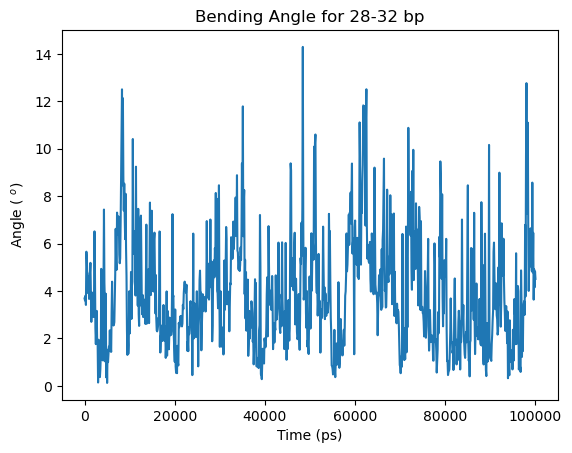

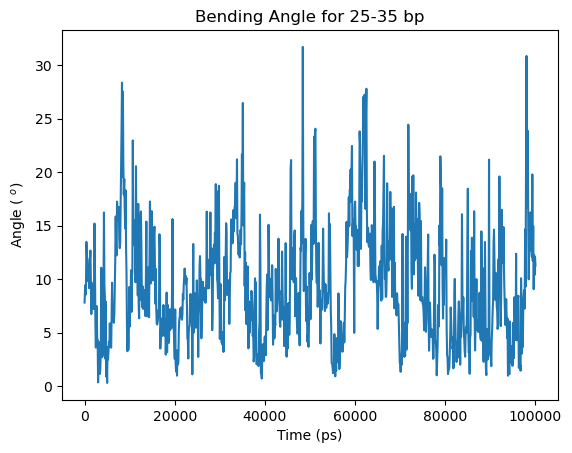

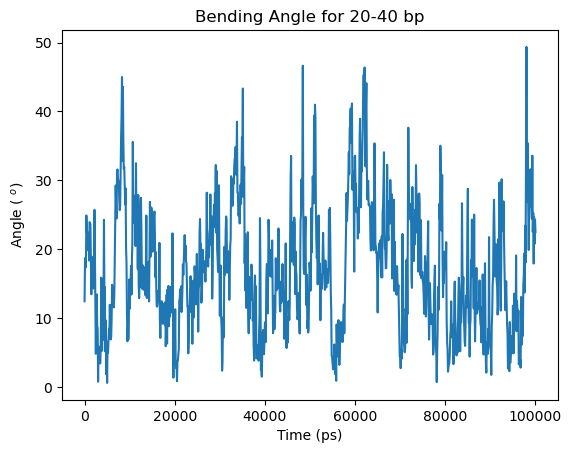

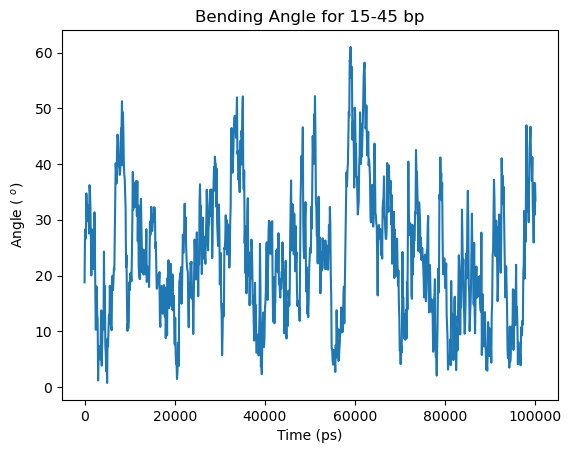

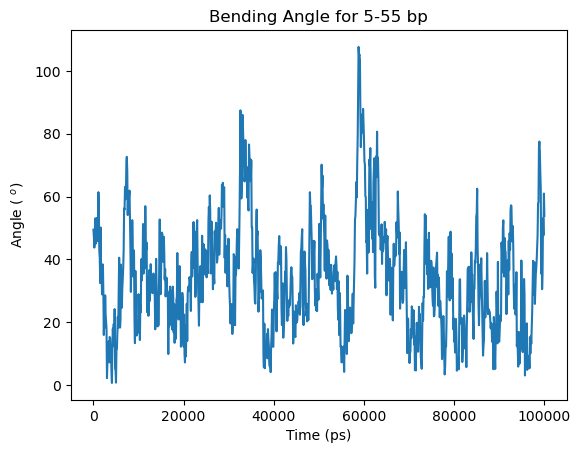

In [7]:
# Angle vs Time for 28-32 bp
plt.title('Bending Angle for 28-32 bp')

# Calculating angle between the tangent vectors of 38th and 32nd base-steps
angle = fdna.calculate_angle_bw_tangents([28,32])
# Change to Degree
angle = np.degrees(angle)
# Plotting
plt.plot(fdna.time, angle)
plt.xlabel('Time (ps)')
plt.ylabel('Angle ( $^o$)')
plt.show()


# Angle vs Time for 25-35 bp
plt.title('Bending Angle for 25-35 bp')

# Calculating angle between the tangent vectors of 25th and 35th base-steps
angle = fdna.calculate_angle_bw_tangents([25,35])
# Change to Degree
angle = np.degrees(angle)
# Plotting
plt.plot(fdna.time, angle)
plt.xlabel('Time (ps)')
plt.ylabel('Angle ( $^o$)')
plt.show()

# Angle vs Time for 20-40 bp
plt.title('Bending Angle for 20-40 bp')

# Calculating angle between the tangent vectors of 20th and 40th base-steps
angle = fdna.calculate_angle_bw_tangents([20,40])
# Change to Degree
angle = np.degrees(angle)
# Plotting
plt.plot(fdna.time, angle)
plt.xlabel('Time (ps)')
plt.ylabel('Angle ( $^o$)')
plt.show()

# Angle vs Time for 15-45 bp
plt.title('Bending Angle for 15-45 bp')

# Calculating angle between the tangent vectors of 15th and 45th base-steps
angle = fdna.calculate_angle_bw_tangents([15,45])
# Change to Degree
angle = np.degrees(angle)
# Plotting
plt.plot(fdna.time, angle)
plt.xlabel('Time (ps)')
plt.ylabel('Angle ( $^o$)')
plt.show()

# Angle vs Time for 5-55 bp
plt.title('Bending Angle for 5-55 bp')

# Calculating angle between the tangent vectors of 5th and 55th base-steps
angle = fdna.calculate_angle_bw_tangents([5,55])
# Change to Degree
angle = np.degrees(angle)
# Plotting
plt.plot(fdna.time, angle)
plt.xlabel('Time (ps)')
plt.ylabel('Angle ( $^o$)')
plt.show()